In [1]:
import pandas as pd
import numpy as np
from datetime import datetime 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_xls = pd.ExcelFile("Daten_Aufgabe_1 - Shop Analyse.xlsx")
df_xls

In [4]:
df_p1 = pd.read_excel(df_xls, sheet_name='P1')
df_p1.head()

,Datum,Umsatz
0,Jan,15562.548244
1,Feb,14055.574404
2,Mrz,15633.906605
3,Apr,15792.846962
4,Mai,16947.490126


In [5]:
df_p1.rename(columns= {'Umsatz' : 'Produkt_A_Inland'}, inplace=True)
df_p1.head(2)

,Datum,Produkt_A_Inland
0,Jan,15562.548244
1,Feb,14055.574404


In [8]:
df_p2 = pd.read_excel(df_xls, sheet_name='P2')
df_p2.head(2)

,Datum,Umsatz
0,Jan,14774.456985
1,Feb,15176.474454


In [9]:
df_p2.rename(columns= {'Umsatz' : 'Produkt_B_Inland'}, inplace=True)
df_p2.head(2)

,Datum,Produkt_B_Inland
0,Jan,14774.456985
1,Feb,15176.474454


In [15]:
df_p3 = pd.read_excel(df_xls, sheet_name='P3')
df_p3.rename(columns= {'Umsatz' : 'Produkt_C_Inland'}, inplace=True)
df_p3.head(2)

,Datum,Produkt_C_Inland
0,Jan,148945.166650
1,Feb,128859.949494


In [11]:
df_p3.rename(columns= {'Umsatz' : 'Produkt_C_Inland'}, inplace=True)
df_p3.head(2)

,Datum,Produkt_C_Inland
0,Jan,148945.166650
1,Feb,128859.949494


In [12]:
df_2 = pd.merge(df_p1, df_p2)
df_2.head(5)

,Datum,Produkt_A_Inland,Produkt_B_Inland
0,Jan,15562.548244,14774.456985
1,Feb,14055.574404,15176.474454
2,Mrz,15633.906605,18280.334382
3,Apr,15792.846962,19095.318361
4,Mai,16947.490126,20206.106573


In [24]:
df_inland = pd.merge(df_2, df_p3)
df_inland.head(2)

,Datum,Produkt_A_Inland,Produkt_B_Inland,Produkt_C_Inland
0,Jan,15562.548244,14774.456985,148945.166650
1,Feb,14055.574404,15176.474454,128859.949494


In [25]:
xls_filename = 'cleaned_data_inland.xlsx'
df_inland.to_excel(xls_filename, index=False) 

In [18]:
df_inland['Produkt_A_Inland_sum'] = df_inland["Produkt_A_Inland"].cumsum()
df_inland['Produkt_B_Inland_sum'] = df_inland["Produkt_B_Inland"].cumsum()
df_inland['Produkt_C_Inland_sum'] = df_inland["Produkt_C_Inland"].cumsum()

df_inland.head()

,Datum,Produkt_A_Inland,Produkt_B_Inland,Produkt_C_Inland,Produkt_A_Inland_sum,Produkt_B_Inland_sum,Produkt_C_Inland_sum
0,Jan,15562.548244,14774.456985,148945.166650,15562.548244,14774.456985,148945.166650
1,Feb,14055.574404,15176.474454,128859.949494,29618.122648,29950.931440,277805.116144
2,Mrz,15633.906605,18280.334382,141602.709028,45252.029253,48231.265822,419407.825172
3,Apr,15792.846962,19095.318361,133780.491099,61044.876215,67326.584182,553188.316272
4,Mai,16947.490126,20206.106573,135993.779232,77992.366341,87532.690755,689182.095504


In [23]:
df_inland_sum = df_inland.drop(df_inland.columns[[1, 2, 3]], axis=1)
df_inland_sum.head()

,Datum,Produkt_A_Inland_sum,Produkt_B_Inland_sum,Produkt_C_Inland_sum
0,Jan,15562.548244,14774.456985,148945.166650
1,Feb,29618.122648,29950.931440,277805.116144
2,Mrz,45252.029253,48231.265822,419407.825172
3,Apr,61044.876215,67326.584182,553188.316272
4,Mai,77992.366341,87532.690755,689182.095504


In [22]:
xls_filename = 'cleaned_data_inland_sum.xlsx'
df_inland_sum.to_excel(xls_filename, index=False) 

In [194]:
df_csv = pd.read_csv("Daten_Aufgabe_1 - Shopauswertung.csv",  delimiter=";")
df_csv['Datum'] = pd.to_datetime(df_csv.Datum, format='%d.%m.%Y')
df_csv.head(3)

,Datum,Produkt,Umsatz
0,2021-01-01,A,17.132115
1,2021-01-02,A,57.353725
2,2021-01-03,A,114.746857


In [195]:
grouped = df_csv.groupby('Produkt')

# Create a dictionary of DataFrames
data_frames = {group: frame for group, frame in grouped}

# Print the individual DataFrames
for group, frame in data_frames.items():
    print(f"DataFrame for category '{group}':")
    print(frame)
    print()



DataFrame for category 'A':
         Datum Produkt      Umsatz
0   2021-01-01       A   17.132115
1   2021-01-02       A   57.353725
2   2021-01-03       A  114.746857
3   2021-01-04       A  113.251181
4   2021-01-05       A    4.186462
..         ...     ...         ...
360 2021-12-27       A   48.681712
361 2021-12-28       A   54.774542
362 2021-12-29       A  151.450508
363 2021-12-30       A   39.406492
364 2021-12-31       A  111.467425

[365 rows x 3 columns]

DataFrame for category 'A+B+C':
          Datum Produkt        Umsatz
730  2021-01-01   A+B+C   18598.65588
731  2021-01-02   A+B+C   18809.41684
732  2021-01-03   A+B+C   19247.89036
733  2021-01-04   A+B+C   19511.08905
734  2021-01-05   A+B+C   20047.04458
...         ...     ...           ...
1090 2021-12-27   A+B+C  197909.24160
1091 2021-12-28   A+B+C  198014.84050
1092 2021-12-29   A+B+C  198355.27600
1093 2021-12-30   A+B+C  199081.44610
1094 2021-12-31   A+B+C  199213.85310

[365 rows x 3 columns]

DataFrame for 

In [196]:
df_a = data_frames['A']
df_a = df_a[['Datum', 'Umsatz']]
df_a.rename(columns={'Umsatz' : 'Umsatz_A'}, inplace=True)
df_a.head()

C:\Users\User\AppData\Local\Temp\ipykernel_13108\609015164.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_a.rename(columns={'Umsatz' : 'Umsatz_A'}, inplace=True)


,Datum,Umsatz_A
0,2021-01-01,17.132115
1,2021-01-02,57.353725
2,2021-01-03,114.746857
3,2021-01-04,113.251181
4,2021-01-05,4.186462


In [197]:
df_b = data_frames['B']
df_b = df_b[['Datum', 'Umsatz']]
df_b.rename(columns={'Umsatz' : 'Umsatz_B'}, inplace=True)
df_b.head(5)

C:\Users\User\AppData\Local\Temp\ipykernel_13108\3038423765.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_b.rename(columns={'Umsatz' : 'Umsatz_B'}, inplace=True)


,Datum,Umsatz_B
365,2021-01-01,189.467425
366,2021-01-02,286.467425
367,2021-01-03,346.467425
368,2021-01-04,441.467425
369,2021-01-05,445.467425


In [198]:
df_abc = data_frames['A+B+C']
df_abc = df_abc[['Datum', 'Umsatz']]
df_abc.rename(columns={'Umsatz' : 'Umsatz_ABC'}, inplace=True)
df_abc.head()

C:\Users\User\AppData\Local\Temp\ipykernel_13108\2150676271.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_abc.rename(columns={'Umsatz' : 'Umsatz_ABC'}, inplace=True)


,Datum,Umsatz_ABC
730,2021-01-01,18598.65588
731,2021-01-02,18809.41684
732,2021-01-03,19247.89036
733,2021-01-04,19511.08905
734,2021-01-05,20047.04458


In [ ]:
#df_aus = df_csv.pivot(index = 'Datum', columns='Produkt', values='Umsatz')
#df_aus.head(4)


In [162]:
df_b_1 = df_b.copy()
df_b_1.head(2)

,Datum,Umsatz_B
365,2021-01-01,189.467425
366,2021-01-02,286.467425


In [163]:
df_b_1['diff'] = df_b_1['Umsatz_B'].diff().fillna(0)
# df.groupby(level=0).diff().fillna(df).reset_index()
df_b_1.head(5)

,Datum,Umsatz_B,diff
365,2021-01-01,189.467425,0.0
366,2021-01-02,286.467425,97.0
367,2021-01-03,346.467425,60.0
368,2021-01-04,441.467425,95.0
369,2021-01-05,445.467425,4.0


In [164]:
df_b_1['diff'][365] = df_b_1['Umsatz_B'][365]
df_b_1.reset_index()
df_b_1.head

C:\Users\User\AppData\Local\Temp\ipykernel_13108\366186717.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_b_1['diff'][365] = df_b_1['Umsatz_B'][365]


<bound method NDFrame.head of          Datum      Umsatz_B        diff
365 2021-01-01    189.467425  189.467425
366 2021-01-02    286.467425   97.000000
367 2021-01-03    346.467425   60.000000
368 2021-01-04    441.467425   95.000000
369 2021-01-05    445.467425    4.000000
..         ...           ...         ...
725 2021-12-27  18261.467430   15.000000
726 2021-12-28  18325.467430   64.000000
727 2021-12-29  18368.467430   43.000000
728 2021-12-30  18467.467430   99.000000
729 2021-12-31  18533.467430   66.000000

[365 rows x 3 columns]>

In [165]:
df_b_1.rename(columns={'diff': 'Umsatz_B_diff'}, inplace=True)
df_b_1.head()

,Datum,Umsatz_B,Umsatz_B_diff
365,2021-01-01,189.467425,189.467425
366,2021-01-02,286.467425,97.000000
367,2021-01-03,346.467425,60.000000
368,2021-01-04,441.467425,95.000000
369,2021-01-05,445.467425,4.000000


In [166]:
df_abc_1 = df_abc.copy()
df_abc_1.head(5)

,Datum,Umsatz_ABC
730,2021-01-01,18598.65588
731,2021-01-02,18809.41684
732,2021-01-03,19247.89036
733,2021-01-04,19511.08905
734,2021-01-05,20047.04458


In [ ]:
#df_abc_1['diff'] = df_abc['Umsatz_ABC'].diff().fillna(0)
# df.groupby(level=0).diff().fillna(df).reset_index()
#df_abc_1.head()

In [ ]:
#df_abc_1['diff'][730] = df_abc_1['diff'].median()
#df_abc_1.head()

In [ ]:
#df_abc_1.rename(columns={'diff': 'Umsatz_ABC_diff'}, inplace=True)
#df_abc_1.head()

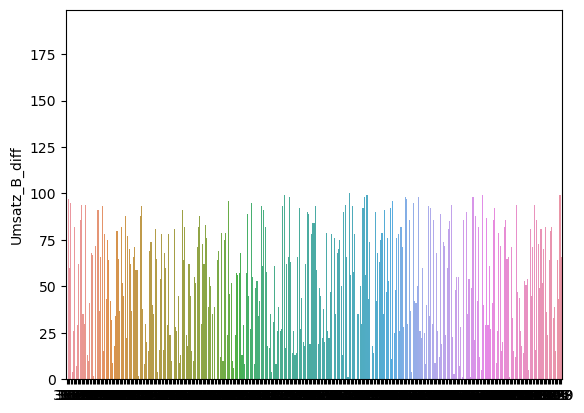

In [167]:
sns.barplot(x=df_b_1.index, y=df_b_1['Umsatz_B_diff'], data=df_b_1)

# Show the plot
plt.show()

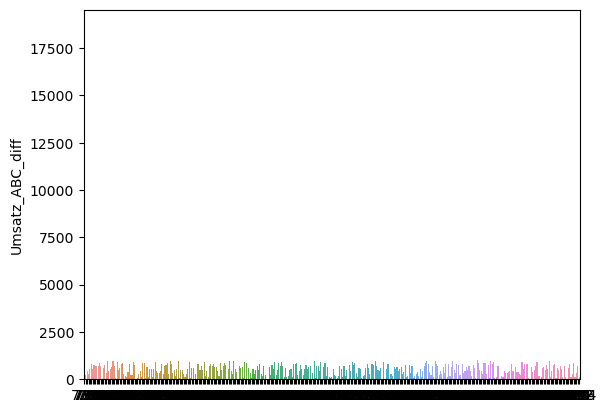

In [284]:
sns.barplot(x=df_abc_1.index, y=df_abc_1['Umsatz_ABC_diff'], data=df_abc_1)

# Show the plot
plt.show()

In [168]:
#df_b_1.rename(columns={'Umsatz' : 'Umsatz_B'}, inplace=True)
df_b_1= df_b_1[['Datum', 'Umsatz_B_diff']]
df_b_1.head()

,Datum,Umsatz_B_diff
365,2021-01-01,189.467425
366,2021-01-02,97.000000
367,2021-01-03,60.000000
368,2021-01-04,95.000000
369,2021-01-05,4.000000


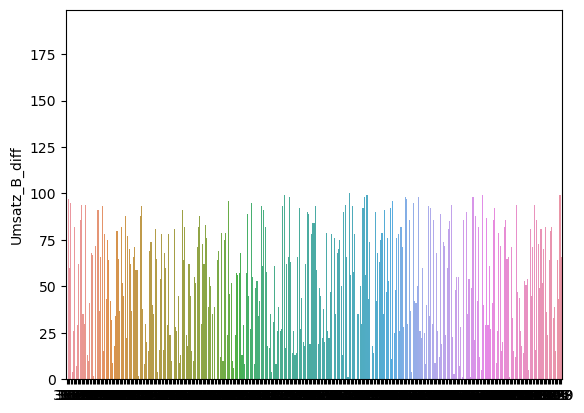

In [169]:
sns.barplot(x=df_b_1.index, y=df_b_1['Umsatz_B_diff'], data=df_b_1)

# Show the plot
plt.show()

In [170]:
df_ab = df_a.merge(df_b_1, on='Datum')
df_abc_1 = df_ab.merge(df_abc, on='Datum') 

df_abc_1

,Datum,Umsatz_A,Umsatz_B_diff,Umsatz_ABC
0,2021-01-01,17.132115,189.467425,18598.65588
1,2021-01-02,57.353725,97.000000,18809.41684
2,2021-01-03,114.746857,60.000000,19247.89036
3,2021-01-04,113.251181,95.000000,19511.08905
4,2021-01-05,4.186462,4.000000,20047.04458
...,...,...,...,...
360,2021-12-27,48.681712,15.000000,197909.24160
361,2021-12-28,54.774542,64.000000,198014.84050
362,2021-12-29,151.450508,43.000000,198355.27600
363,2021-12-30,39.406492,99.000000,199081.44610


In [171]:
df_abc_1['Umsatz_C'] = df_abc_1['Umsatz_ABC'] - df_abc_1['Umsatz_A'] - df_abc_1['Umsatz_B_diff']
df_abc_1.head()

,Datum,Umsatz_A,Umsatz_B_diff,Umsatz_ABC,Umsatz_C
0,2021-01-01,17.132115,189.467425,18598.65588,18392.056339
1,2021-01-02,57.353725,97.000000,18809.41684,18655.063115
2,2021-01-03,114.746857,60.000000,19247.89036,19073.143503
3,2021-01-04,113.251181,95.000000,19511.08905,19302.837869
4,2021-01-05,4.186462,4.000000,20047.04458,20038.858118


In [172]:
df_abc_1['diff_C'] = df_abc_1['Umsatz_C'].diff().fillna(0)

df_abc_1.head()

,Datum,Umsatz_A,Umsatz_B_diff,Umsatz_ABC,Umsatz_C,diff_C
0,2021-01-01,17.132115,189.467425,18598.65588,18392.056339,0.000000
1,2021-01-02,57.353725,97.000000,18809.41684,18655.063115,263.006775
2,2021-01-03,114.746857,60.000000,19247.89036,19073.143503,418.080388
3,2021-01-04,113.251181,95.000000,19511.08905,19302.837869,229.694366
4,2021-01-05,4.186462,4.000000,20047.04458,20038.858118,736.020249


In [108]:
# df_abc_1['diff_C'][0] = df_abc_1['Umsatz_ABC'][0] - df_abc_1['Umsatz_A'][0] - df_abc_1['Umsatz_B'][0]
# df_c_1 = df_abc_1[['Datum', 'diff_C']]
# df_c_1.head()

C:\Users\User\AppData\Local\Temp\ipykernel_13108\1946880761.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_abc_1['diff_C'][0] = df_abc_1['Umsatz_ABC'][0] - df_abc_1['Umsatz_A'][0] - df_abc_1['Umsatz_B'][0]


,Datum,diff_C
0,2021-01-01,18392.056339
1,2021-02-01,73.539350
2,2021-03-01,321.080388
3,2021-04-01,169.694366
4,2021-05-01,641.020249


In [173]:
df_c_1.rename(columns={'diff_C' : 'Umsatz_C_diff'}, inplace=True)
df_c_1.head()

C:\Users\User\AppData\Local\Temp\ipykernel_13108\3403761110.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_c_1.rename(columns={'diff_C' : 'Umsatz_C_diff'}, inplace=True)


,Datum,Umsatz_C_diff
0,2021-01-01,18392.056339
1,2021-02-01,73.539350
2,2021-03-01,321.080388
3,2021-04-01,169.694366
4,2021-05-01,641.020249


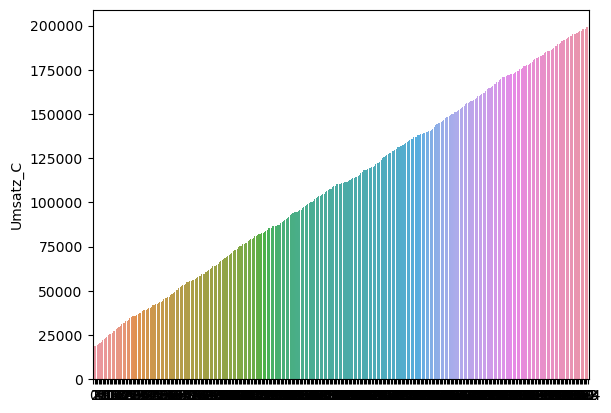

In [174]:
sns.barplot(x=df_abc_1.index, y=df_abc_1['Umsatz_C'], data=df_abc_1)

# Show the plot
plt.show()

In [175]:
df = df_a.merge(df_b_1, on='Datum') 
df = df.merge(df_c_1, on='Datum')
df.head()

,Datum,Umsatz_A,Umsatz_B_diff,Umsatz_C_diff
0,2021-01-01,17.132115,189.467425,18392.056339
1,2021-01-02,57.353725,97.000000,150.353614
2,2021-01-03,114.746857,60.000000,589.032382
3,2021-01-04,113.251181,95.000000,272.403917
4,2021-01-05,4.186462,4.000000,-30.435265


In [176]:
csv_filename = 'cleaned_data_ausland.csv'
df.to_csv(csv_filename, index=False) 

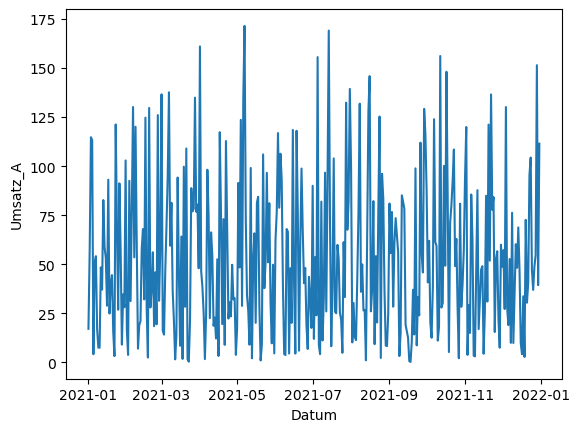

In [177]:
sns.lineplot(x=df['Datum'], y=df['Umsatz_A'], data=df)
#sns.lineplot(x=df['Datum'], y=df['Umsatz_B_diff'], data=df)
#sns.lineplot(x=df['Datum'], y=df['Umsatz_C_diff'], data=df)
%matplotlib inline
plt.rcParams["figure.figsize"] = [15, 15]
plt.show()

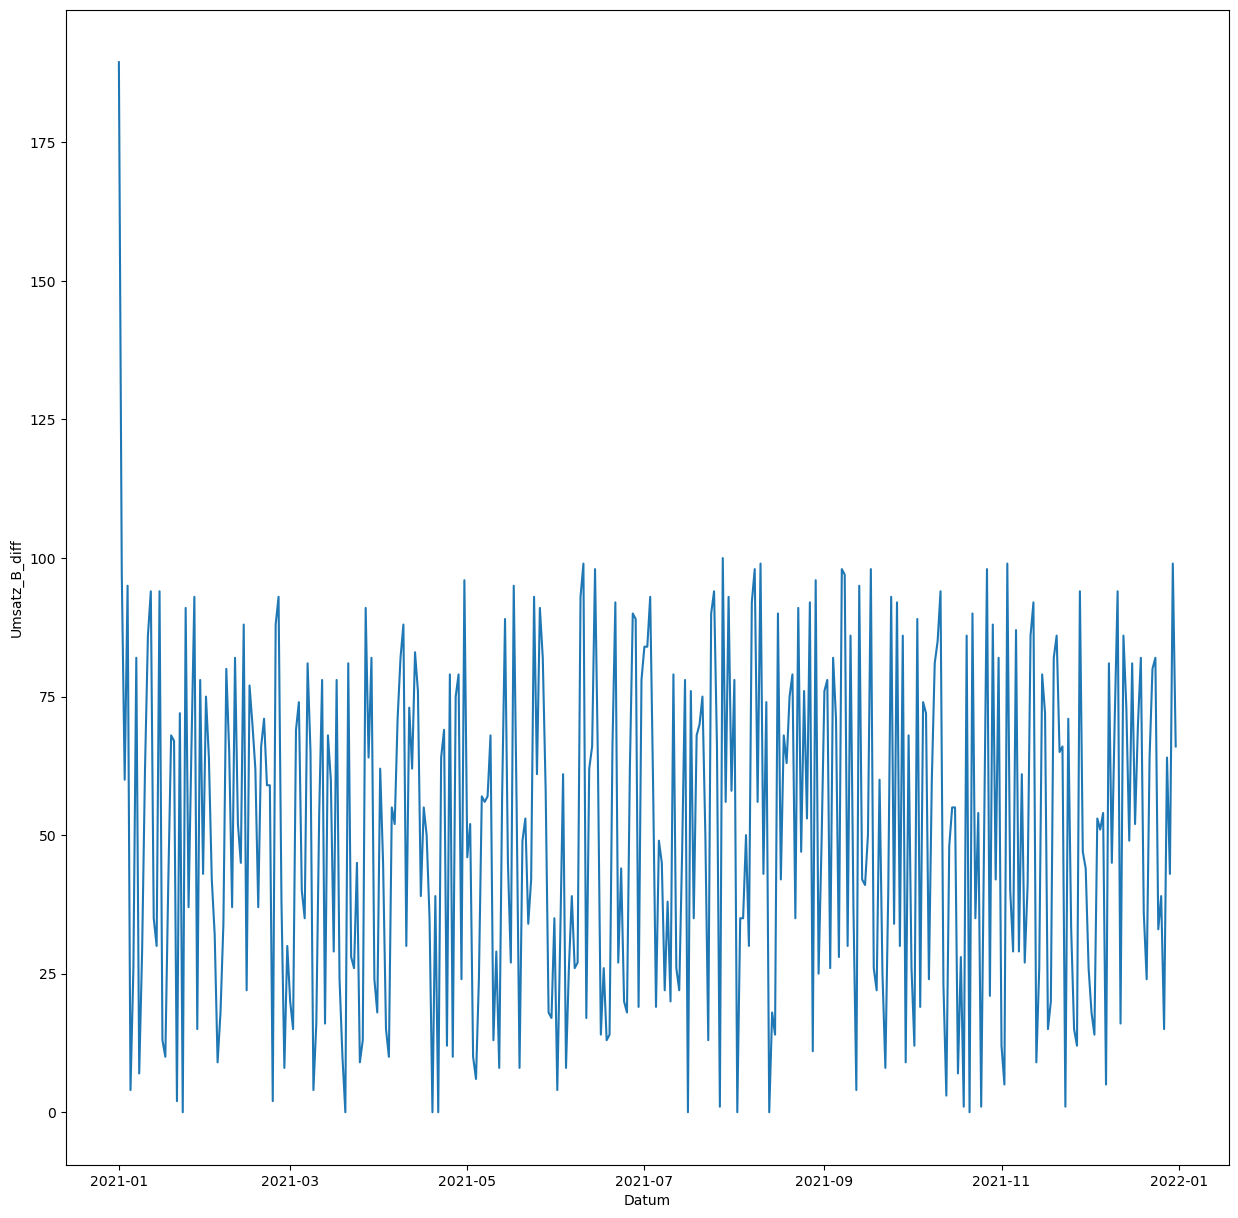

In [178]:
#sns.lineplot(x=df['Datum'], y=df['Umsatz_A'], data=df)
sns.lineplot(x=df['Datum'], y=df['Umsatz_B_diff'], data=df)
#sns.lineplot(x=df['Datum'], y=df['Umsatz_C_diff'], data=df)
plt.show()

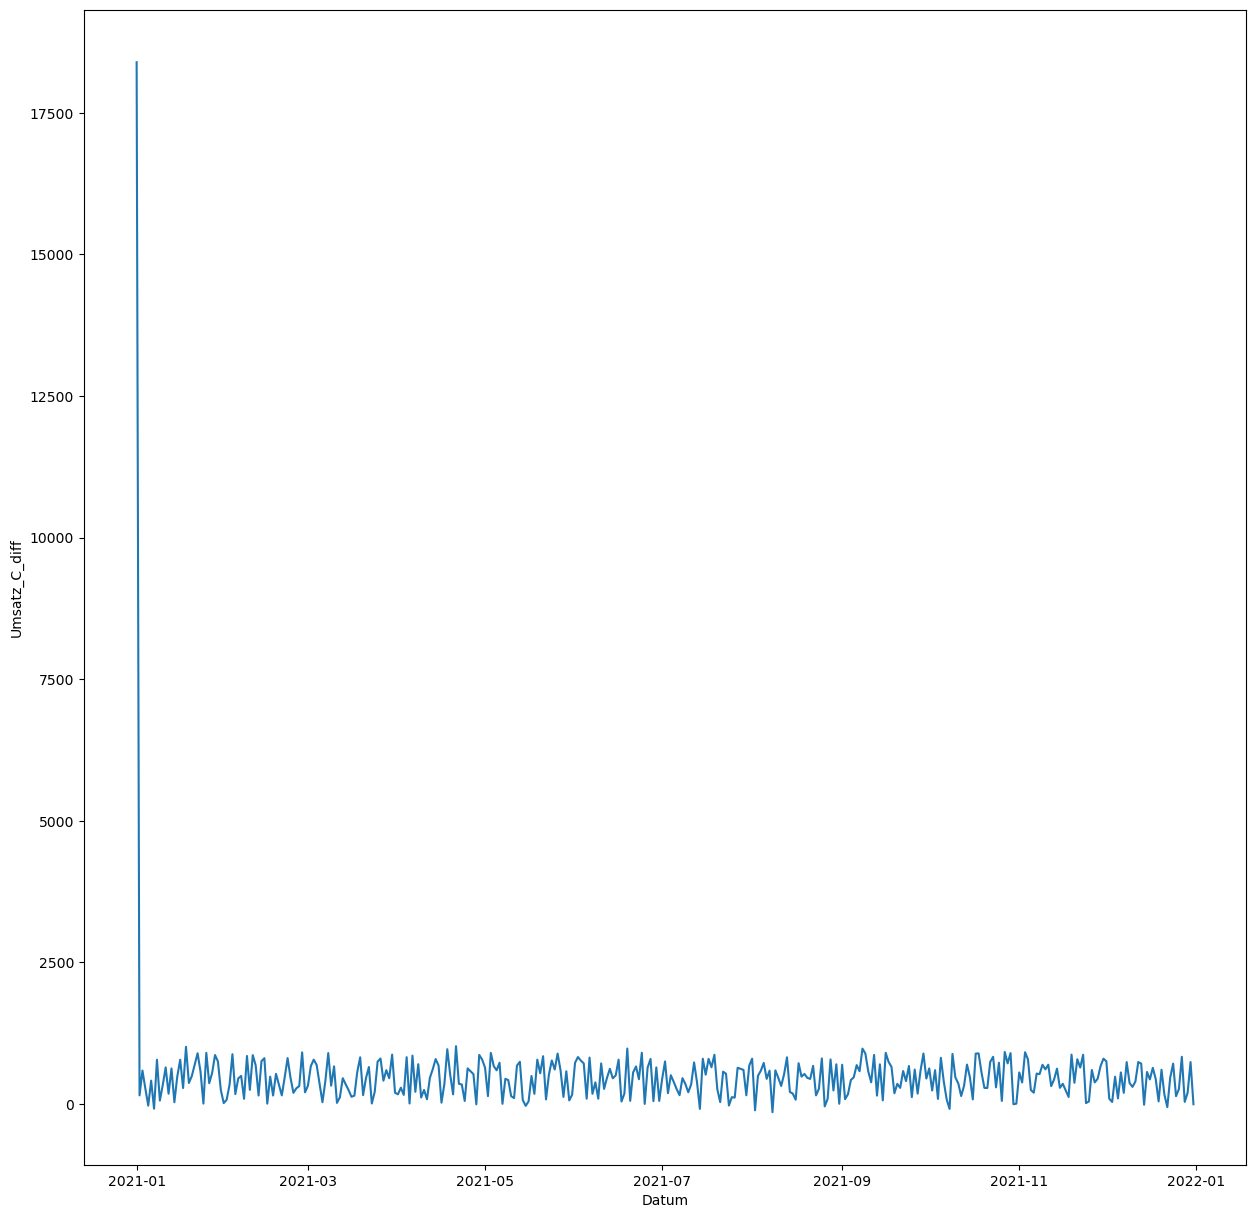

In [179]:
#sns.lineplot(x=df['Datum'], y=df['Umsatz_A'], data=df)
#sns.lineplot(x=df['Datum'], y=df['Umsatz_B_diff'], data=df)
sns.lineplot(x=df['Datum'], y=df['Umsatz_C_diff'], data=df)
plt.show()

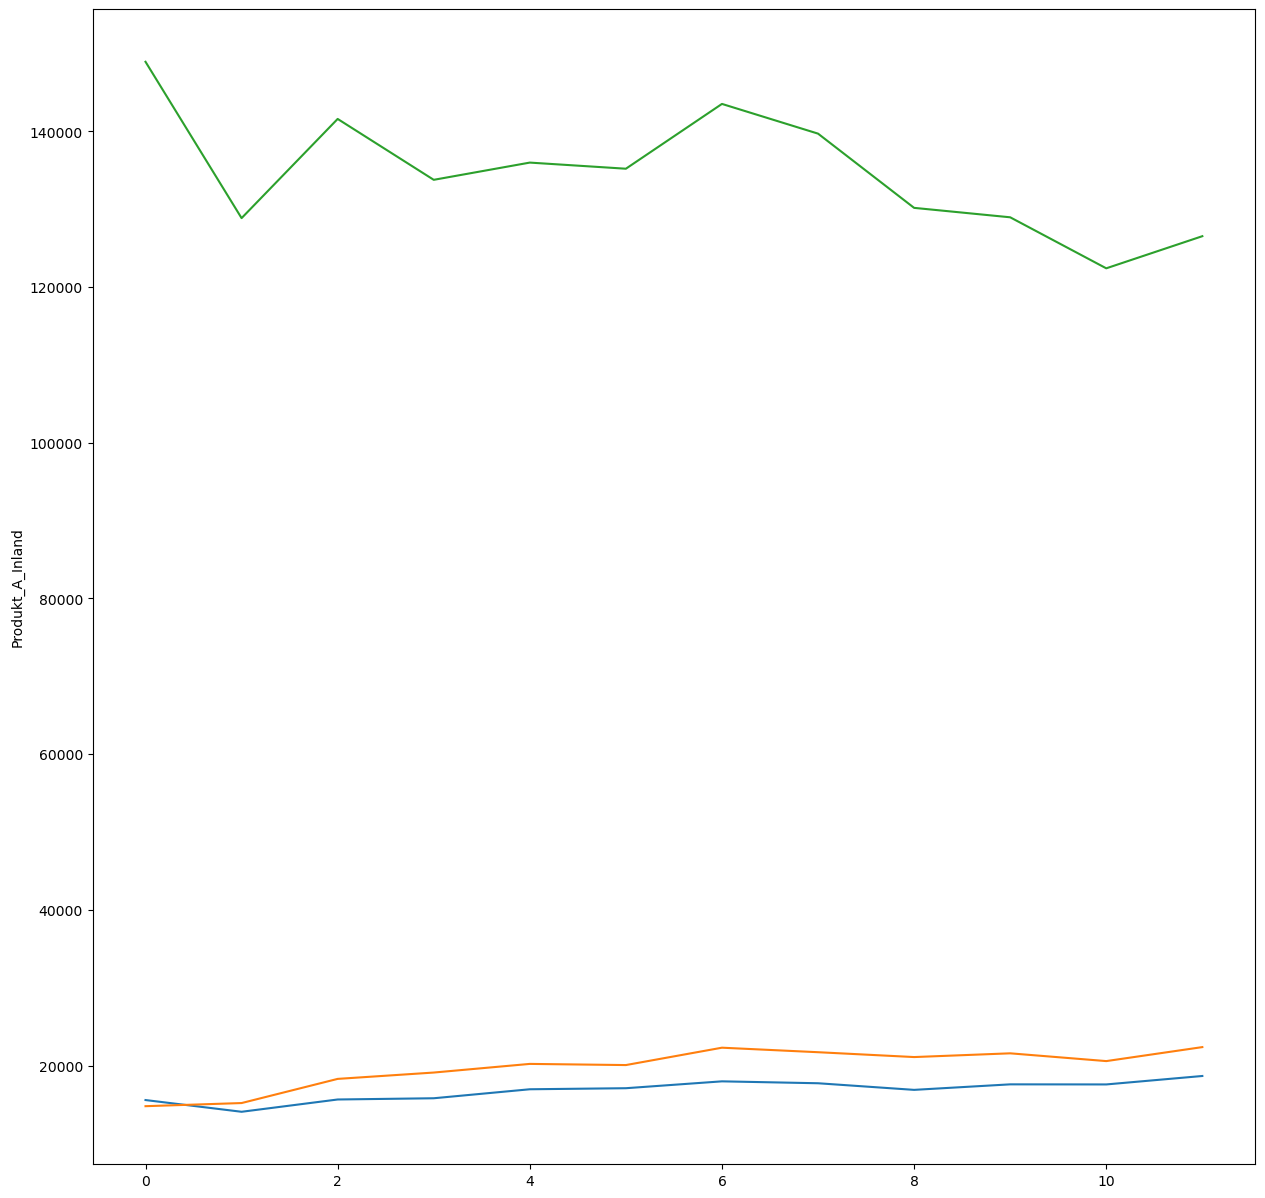

In [180]:
sns.lineplot(x=df_inland.index, y=df_inland['Produkt_A_Inland'], data=df_inland)
sns.lineplot(x=df_inland.index, y=df_inland['Produkt_B_Inland'], data=df_inland)
sns.lineplot(x=df_inland.index, y=df_inland['Produkt_C_Inland'], data=df_inland)
# Show the plot
plt.show()


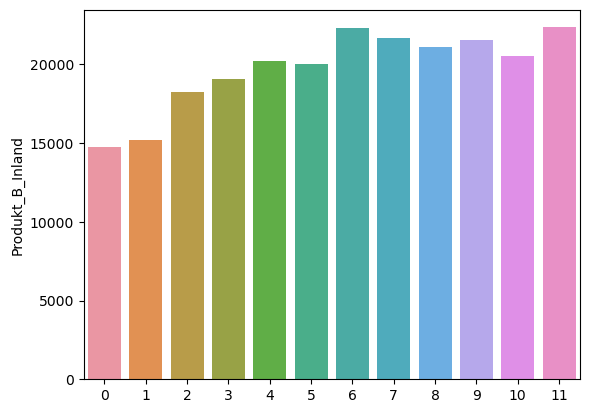

In [293]:
sns.barplot(x=df_inland.index, y=df_inland['Produkt_B_Inland'], data=df_inland)

# Show the plot
plt.show()

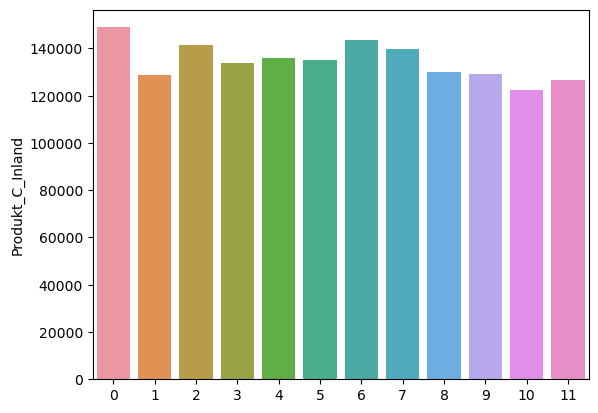

In [294]:
sns.barplot(x=df_inland.index, y=df_inland['Produkt_C_Inland'], data=df_inland)

# Show the plot
plt.show()